In [1]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from collections import Counter

In [2]:
data = pd.read_csv('../data/raw/filtered.tsv', sep='\t')
del data["Unnamed: 0"]
data["length_diff"] = data["lenght_diff"]
del data["lenght_diff"]

In [3]:
data.sample(n=5)

,reference,translation,similarity,ref_tox,trn_tox,length_diff
9539,I seem to have the only primate in the country...,I only have a monkey in a country that's a dru...,0.727844,0.050215,0.982835,0.188406
363470,"If I have to take out one of my own, I'll do it.","if I have to kill one of us, I'll do it.",0.707810,0.000119,0.998701,0.163265
162327,It's like being in the middle of a bloody fog!',I feel like I'm in the middle of a damn mist! ',0.789465,0.003462,0.954529,0.000000
518642,I later learned they were mostly Jews... weari...,"later, I found out it was all Jews...... with ...",0.602165,0.000383,0.947103,0.260417
183023,"Well, yeah, that's 'cause guys my age are lame.","that's right, 'cause guys my age ain't worth n...",0.689252,0.975123,0.004659,0.111111


In [4]:
data.describe()

,similarity,ref_tox,trn_tox,length_diff
count,577777.000000,577777.000000,577777.000000,577777.000000
mean,0.758469,0.541372,0.434490,0.157652
std,0.092695,0.457571,0.458904,0.108057
min,0.600001,0.000033,0.000033,0.000000
25%,0.681105,0.012171,0.000707,0.066667
50%,0.754439,0.806795,0.085133,0.141791
75%,0.831244,0.990469,0.973739,0.238095
max,0.950000,0.999724,0.999730,0.400000


### Difference in parallel texts toxicity

0.5000 0.9997 0.9047 0.1265


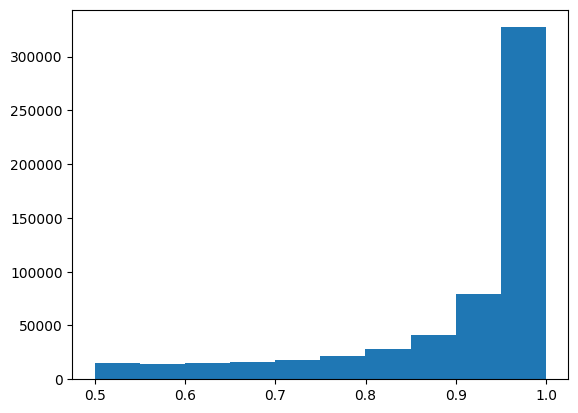

In [5]:
diff = np.abs(data.ref_tox - data.trn_tox)
print("%.4f %.4f %.4f %.4f" % (min(diff), max(diff), np.mean(diff), np.std(diff)))
plt.hist(diff);

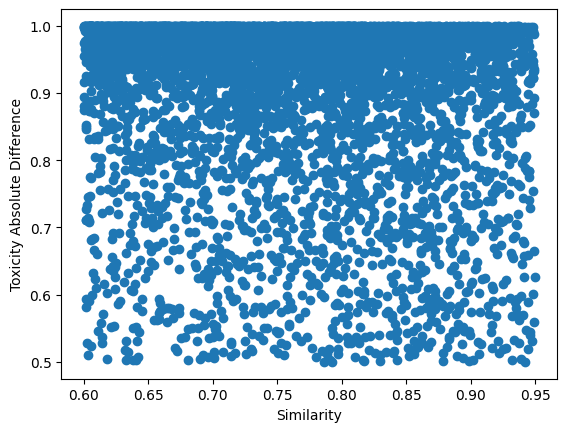

In [6]:
# random subsetting is done for density visualization purposes
random_subset = np.random.choice(data.index, size=round(len(data)*0.01), replace=False)
sub_data = data.iloc[random_subset]
plt.scatter(sub_data['similarity'], np.abs(sub_data['ref_tox'] - sub_data['trn_tox']))
plt.xlabel('Similarity') 
plt.ylabel('Toxicity Absolute Difference');

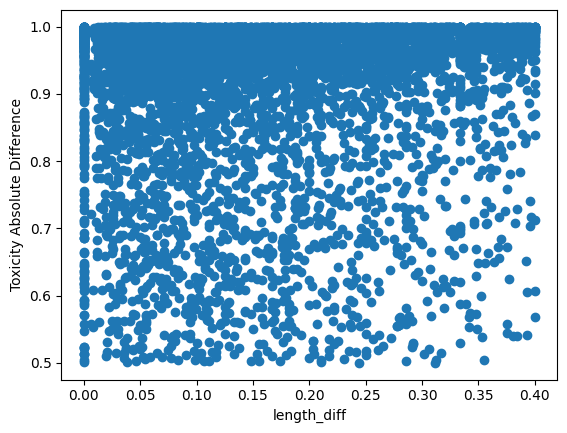

In [7]:
# random subsetting is done for density visualization purposes
random_subset = np.random.choice(data.index, size=round(len(data)*0.01), replace=False)
sub_data = data.iloc[random_subset]
plt.scatter(sub_data['length_diff'], np.abs(sub_data['ref_tox'] - sub_data['trn_tox']))
plt.xlabel('length_diff') 
plt.ylabel('Toxicity Absolute Difference');

### Analyzing texts

In [8]:
high_toxicity_counter = Counter()
low_toxicity_counter = Counter()
for i, row in tqdm(data.iterrows()):
    if row["ref_tox"] < row["trn_tox"]:
        low_tox, high_tox = row["reference"], row["translation"]
    else:
        low_tox, high_tox = row["translation"], row["reference"]
    low_toxicity_counter.update(nltk.tokenize.word_tokenize(low_tox.lower()))
    high_toxicity_counter.update(nltk.tokenize.word_tokenize(high_tox.lower()))

0it [00:00, ?it/s]

In [9]:
len(high_toxicity_counter), len(low_toxicity_counter)

(89268, 96375)

In [10]:
delta = 1e3
potential_toxic_words = []
for word in tqdm(high_toxicity_counter):
    freq_diff = high_toxicity_counter.get(word, 0) - low_toxicity_counter.get(word, 0)
    if freq_diff > delta:
        potential_toxic_words.append((word, high_toxicity_counter[word], low_toxicity_counter[word]))

  0%|          | 0/89268 [00:00<?, ?it/s]

In [11]:
sorted(potential_toxic_words, key=lambda x: x[1] - x[2], reverse=True)[:30]

[('shit', 31386, 148),
 ('fucking', 30758, 437),
 ('fuck', 20028, 111),
 ('damn', 20891, 1019),
 ('a', 164057, 150506),
 ('.', 445710, 433222),
 ('kill', 20809, 8699),
 ('you', 239113, 229307),
 ('!', 70588, 61304),
 ('ass', 9229, 56),
 ('your', 59991, 50890),
 ('up', 31443, 22858),
 ('stupid', 8667, 236),
 ('shut', 9062, 1732),
 ('na', 19951, 12772),
 ('gon', 18126, 11789),
 ('hell', 20537, 14370),
 ('goddamn', 5771, 14),
 (',', 364701, 358959),
 ('fucked', 5488, 24),
 ('sex', 9485, 4041),
 ('that', 68971, 63538),
 ('shoot', 7809, 2390),
 ('fool', 6027, 936),
 ('bitch', 4654, 21),
 ('crap', 4698, 160),
 ('die', 12214, 7719),
 ('this', 40103, 35647),
 ('...', 55128, 50716),
 ('ridiculous', 4331, 202)]

In [16]:
for i in np.random.choice(data.index, size=15, replace=False):
    row = data.iloc[i]
    if row["ref_tox"] < row["trn_tox"]:
        low_tox, high_tox = row["reference"], row["translation"]
    else:
        low_tox, high_tox = row["translation"], row["reference"]
    print(high_tox)
    print(low_tox)
    print(abs(row["ref_tox"] - row["trn_tox"]), row["similarity"])
    print('-' * 45)

You want to sit on that piece of shit or keep it as a memento of how well you took care of her ?
do you want to sit on him or have him as a reminder of how well you took care of her?
0.9992659850977361 0.83512562796
---------------------------------------------
I'm the worst of all.
I'm worse than all of them
0.9251977698877455 0.6925484232699999
---------------------------------------------
Nobukado, even though he's so similar to me, he's so wicked they should have crucified him.
Even with this resemblance, Nobukado, he is so wicked as to be sentenced to crucifixion.
0.633444458246231 0.6002778075249999
---------------------------------------------
you're my friend, 'cause I'm gonna get all that cooler, and I'm yours,' cause I'm gonna fucking do what you say, and none of your boys want to fuck, 'cause it's useless.
You're my pal because you're the coolest ever, and I'm yours because I'll totally do anything you say and none of your boyfriends ever want to surf me cos' I'm useless.
0.

### Conclusions from the preliminary EDA: